In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/dataset-users/users (2).json
/kaggle/input/embeddings/user_mean_embeddings (1).json
/kaggle/input/abreviations/abbreviations.json
/kaggle/input/augmented/augmented_data.json


In [2]:
import os
import pandas as pd
import numpy as np
import json

In [3]:
users = pd.read_json("/kaggle/input/augmented/augmented_data.json")
data=pd.read_json("/kaggle/input/dataset-users/users (2).json")

In [4]:
contraction_mapping = {"ain't": "is not", "aren't": "are not","can't": "cannot", "'cause": "because", "could've": "could have", "couldn't": "could not", 
                       "didn't": "did not",  "doesn't": "does not", "don't": "do not", "hadn't": "had not", "hasn't": "has not", "haven't": "have not", 
                       "he'd": "he would","he'll": "he will", "he's": "he is", "how'd": "how did", "how'd'y": "how do you", "how'll": "how will", 
                       "how's": "how is",  "I'd": "I would", "I'd've": "I would have", "I'll": "I will", "I'll've": "I will have","I'm": "I am",
                       "I've": "I have", "i'd": "i would", "i'd've": "i would have", "i'll": "i will",  "i'll've": "i will have","i'm": "i am", 
                       "i've": "i have", "isn't": "is not", "it'd": "it would", "it'd've": "it would have", "it'll": "it will", "it'll've": "it will have",
                       "it's": "it is", "let's": "let us", "ma'am": "madam", "mayn't": "may not", "might've": "might have","mightn't": "might not",
                       "mightn't've": "might not have", "must've": "must have", "mustn't": "must not", "mustn't've": "must not have", "needn't": "need not", 
                       "needn't've": "need not have","o'clock": "of the clock", "oughtn't": "ought not", "oughtn't've": "ought not have", "shan't": "shall not",
                       "sha'n't": "shall not", "shan't've": "shall not have", "she'd": "she would", "she'd've": "she would have", "she'll": "she will", 
                       "she'll've": "she will have", "she's": "she is", "should've": "should have", "shouldn't": "should not", "shouldn't've": "should not have",
                       "so've": "so have","so's": "so as", "this's": "this is","that'd": "that would", "that'd've": "that would have", "that's": "that is",
                       "there'd": "there would", "there'd've": "there would have", "there's": "there is", "here's": "here is","they'd": "they would",
                       "they'd've": "they would have", "they'll": "they will", "they'll've": "they will have", "they're": "they are", "they've": "they have",
                       "to've": "to have", "wasn't": "was not", "we'd": "we would", "we'd've": "we would have", "we'll": "we will", "we'll've": "we will have",
                       "we're": "we are", "we've": "we have", "weren't": "were not", "what'll": "what will", "what'll've": "what will have", 
                       "what're": "what are",  "what's": "what is", "what've": "what have", "when's": "when is", "when've": "when have", "where'd": "where did",
                       "where's": "where is", "where've": "where have", "who'll": "who will", "who'll've": "who will have", "who's": "who is", 
                       "who've": "who have", "why's": "why is", "why've": "why have", "will've": "will have", "won't": "will not", "won't've": "will not have", 
                       "would've": "would have", "wouldn't": "would not", "wouldn't've": "would not have", "y'all": "you all", "y'all'd": "you all would",
                       "y'all'd've": "you all would have","y'all're": "you all are","y'all've": "you all have","you'd": "you would", "you'd've": "you would have",
                       "you'll": "you will", "you'll've": "you will have", "you're": "you are", "you've": "you have", 'u.s':'america', 'e.g':'for example'}

punct = [',', '.', '"', ':', ')', '(', '-', '!', '?', '|', ';', "'", '$', '&', '/', '[', ']', '>', '%', '=', '#', '*', '+', '\\', '•',  '~', '@', '£', 
 '·', '_', '{', '}', '©', '^', '®', '`',  '<', '→', '°', '€', '™', '›',  '♥', '←', '×', '§', '″', '′', 'Â', '█', '½', 'à', '…', 
 '“', '★', '”', '–', '●', 'â', '►', '−', '¢', '²', '¬', '░', '¶', '↑', '±', '¿', '▾', '═', '¦', '║', '―', '¥', '▓', '—', '‹', '─', 
 '▒', '：', '¼', '⊕', '▼', '▪', '†', '■', '’', '▀', '¨', '▄', '♫', '☆', 'é', '¯', '♦', '¤', '▲', 'è', '¸', '¾', 'Ã', '⋅', '‘', '∞', 
 '∙', '）', '↓', '、', '│', '（', '»', '，', '♪', '╩', '╚', '³', '・', '╦', '╣', '╔', '╗', '▬', '❤', 'ï', 'Ø', '¹', '≤', '‡', '√', ]

punct_mapping = {"‘": "'", "₹": "e", "´": "'", "°": "", "€": "e", "™": "tm", "√": " sqrt ", "×": "x", "²": "2", "—": "-", "–": "-", "’": "'", "_": "-",
                 "`": "'", '“': '"', '”': '"', '“': '"', "£": "e", '∞': 'infinity', 'θ': 'theta', '÷': '/', 'α': 'alpha', '•': '.', 'à': 'a', '−': '-', 
                 'β': 'beta', '∅': '', '³': '3', 'π': 'pi', '!':' '}

mispell_dict = {'colour': 'color', 'centre': 'center', 'favourite': 'favorite', 'travelling': 'traveling', 'counselling': 'counseling', 'theatre': 'theater',
                'cancelled': 'canceled', 'labour': 'labor', 'organisation': 'organization', 'wwii': 'world war 2', 'citicise': 'criticize', 'youtu ': 'youtube ',
                'Qoura': 'Quora', 'sallary': 'salary', 'Whta': 'What', 'narcisist': 'narcissist', 'howdo': 'how do', 'whatare': 'what are', 'howcan': 'how can',
                'howmuch': 'how much', 'howmany': 'how many', 'whydo': 'why do', 'doI': 'do I', 'theBest': 'the best', 'howdoes': 'how does', 
                'mastrubation': 'masturbation', 'mastrubate': 'masturbate', "mastrubating": 'masturbating', 'pennis': 'penis', 'Etherium': 'Ethereum', 
                'narcissit': 'narcissist', 'bigdata': 'big data', '2k17': '2017', '2k18': '2018', 'qouta': 'quota', 'exboyfriend': 'ex boyfriend', 
                'airhostess': 'air hostess', "whst": 'what', 'watsapp': 'whatsapp', 'demonitisation': 'demonetization', 'demonitization': 'demonetization',
                'demonetisation': 'demonetization'}

In [5]:
def clean_text(text):
    '''Clean emoji, Make text lowercase, remove text in square brackets,remove links,remove punctuation
    and remove words containing numbers.'''
    text = emoji.demojize(text)
    text = re.sub(r'\:(.*?)\:','',text)
    text = str(text).lower()    #Making Text Lowercase
    text = re.sub('\[.*?\]', '', text)
    #The next 2 lines remove html text
    text = BeautifulSoup(text, 'lxml').get_text()
    text = re.sub('https?://\S+|www\.\S+', '', text)
    text = re.sub('<.*?>+', '', text)
    text = re.sub('\n', '', text)
    text = re.sub('\w*\d\w*', '', text)
    # replacing everything with space except (a-z, A-Z, ".", "?", "!", ",", "'")
    text = re.sub(r"[^a-zA-Z?.!,¿']+", " ", text)
    return text

def clean_contractions(text, mapping):
    '''Clean contraction using contraction mapping'''    
    specials = ["’", "‘", "´", "`"]
    for s in specials:
        text = text.replace(s, "'")
    for word in mapping.keys():
        if ""+word+"" in text:
            text = text.replace(""+word+"", ""+mapping[word]+"")
    #Remove Punctuations
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    # creating a space between a word and the punctuation following it
    # eg: "he is a boy." => "he is a boy ."
    text = re.sub(r"([?.!,¿])", r" \1 ", text)
    text = re.sub(r'[" "]+', " ", text)
    return text

def clean_special_chars(text, punct, mapping):
    '''Cleans special characters present(if any)'''   
    for p in mapping:
        text = text.replace(p, mapping[p])
    
    for p in punct:
        text = text.replace(p, f' {p} ')
    
    specials = {'\u200b': ' ', '…': ' ... ', '\ufeff': '', 'करना': '', 'है': ''}  
    for s in specials:
        text = text.replace(s, specials[s])
    
    return text

def correct_spelling(x, dic):
    '''Corrects common spelling errors'''   
    for word in dic.keys():
        x = x.replace(word, dic[word])
    return x

def remove_space(text):
    '''Removes awkward spaces'''   
    #Removes awkward spaces 
    text = text.strip()
    text = text.split()
    return " ".join(text)

def text_preprocessing_pipeline(text):
    '''Cleaning and parsing the text.'''
    text = clean_text(text)
    text = clean_contractions(text, contraction_mapping)
    text = clean_special_chars(text, punct, punct_mapping)
    text = correct_spelling(text, mispell_dict)
    text = remove_space(text)
    return text

In [6]:
users.head()

,text,level2_interest
0,happiness felicidades mi amor te amamos angely...,"[1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, ..."
1,happy birthday queen kourtneykardash there s n...,"[1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, ..."
2,now you know why we re always stressed out hug...,"[0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
3,this kid is never coming back to my stream awa...,"[0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
4,scrolling because you re putting off springcle...,"[0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."


In [7]:
level2_dict = {
    'Business': 0, 'social media': 1, 'Health care': 2, 'parenting': 3, 'dating and mariage': 4, 'family': 5, 
    'bodybuilding': 6, 'running': 7, 'Physical exercise': 8, 'yoga': 9, 'fashion accessories':10, 'toys': 11, 
    'beauty': 12, 'shopping': 13, 'clothing': 14, 'handball': 15, 'volleyball': 16, 'golf': 17, 'football/soccer': 18, 
    'tennis': 19, 'skiing': 4, 'Auto racing': 4, 'baseball': 4, 'marathon': 4, 'swimming': 4, 'american football': 4, 
    'basketball': 4, 'music': 5, 'Games': 5, 'tv and series': 5, 'live events': 5, 'movies': 5, 'reading': 5, 
    'political and socials issues': 6, 'current event homes and garden': 6, 'pets': 6, 'art and music': 6, 
    'vehicles': 6, 'travel': 6, 'computers': 7, 'consumer electronics': 7, 'cooking and cuisine': 8, 
    'food and restaurant': 8, 'beverages': 8, 'alcoholic beverage': 8, 'hiking': 9, 'horseback riding': 9, 
    'fishing': 9, 'camping': 9
}
interests=list(level2_dict.keys())


In [8]:
# Reverse the dictionary to get interest names by index

matched_interests = []

for labels in users['level2_interest']:
    row_interests = [interests[i] for i, interest in enumerate(labels) if interest == 1]
    matched_interests.append(row_interests)

# Add the matched interests as a new column to the DataFrame
users['matched_interests'] = matched_interests

In [9]:
users

,text,level2_interest,matched_interests
0,happiness felicidades mi amor te amamos angely...,"[1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, ...","[Business, social media, parenting, family, bo..."
1,happy birthday queen kourtneykardash there s n...,"[1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, ...","[Business, social media, toys, shopping, cloth..."
2,now you know why we re always stressed out hug...,"[0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[social media, Health care]"
3,this kid is never coming back to my stream awa...,"[0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[social media, live events]"
4,scrolling because you re putting off springcle...,"[0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[social media, Health care]"
...,...,...,...
3582,iphone accessory is ankerwork httpseyes unboxd...,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",[consumer electronics]
3583,iphone accessory is ankerwork httpseyes unboxd...,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",[consumer electronics]
3584,samsung galaxy ultra operating room iphone pro...,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",[consumer electronics]
3585,samsung galaxy ultra operating room iphone pro...,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",[consumer electronics]


In [10]:
users.head()

,text,level2_interest,matched_interests
0,happiness felicidades mi amor te amamos angely...,"[1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, ...","[Business, social media, parenting, family, bo..."
1,happy birthday queen kourtneykardash there s n...,"[1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, ...","[Business, social media, toys, shopping, cloth..."
2,now you know why we re always stressed out hug...,"[0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[social media, Health care]"
3,this kid is never coming back to my stream awa...,"[0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[social media, live events]"
4,scrolling because you re putting off springcle...,"[0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[social media, Health care]"


In [11]:
# users = data[['user_id','username','posts','interests']]

In [12]:
# def extract_sub_interests(interests_dict):
#     return [sub_interest for interests in interests_dict.values() for sub_interest in interests]

# # Apply the function to the 'interests' column and create a new 'sub_interests' column
# data.loc[:, 'sub_interests'] = data['interests'].apply(extract_sub_interests)

In [13]:
# data.head(3)

In [14]:
from sklearn.preprocessing import MultiLabelBinarizer
mlb = MultiLabelBinarizer()
labels = mlb.fit_transform(users.matched_interests)
labels

array([[0, 1, 0, ..., 0, 1, 0],
       [0, 1, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [15]:
len(labels)

3587

In [16]:
list(mlb.classes_)

['Auto racing',
 'Business',
 'Games',
 'Health care',
 'Physical exercise',
 'alcoholic beverage',
 'american football',
 'art and music',
 'baseball',
 'basketball',
 'beauty',
 'beverages',
 'bodybuilding',
 'camping',
 'clothing',
 'computers',
 'consumer electronics',
 'cooking and cuisine',
 'current event homes and garden',
 'dating and mariage',
 'family',
 'fashion accessories',
 'fishing',
 'food and restaurant',
 'football/soccer',
 'golf',
 'handball',
 'hiking',
 'horseback riding',
 'live events',
 'marathon',
 'movies',
 'music',
 'parenting',
 'pets',
 'political and socials issues',
 'reading',
 'running',
 'shopping',
 'skiing',
 'social media',
 'swimming',
 'tennis',
 'toys',
 'travel',
 'tv and series',
 'vehicles',
 'volleyball',
 'yoga']

In [17]:
users.head()

,text,level2_interest,matched_interests
0,happiness felicidades mi amor te amamos angely...,"[1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, ...","[Business, social media, parenting, family, bo..."
1,happy birthday queen kourtneykardash there s n...,"[1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, ...","[Business, social media, toys, shopping, cloth..."
2,now you know why we re always stressed out hug...,"[0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[social media, Health care]"
3,this kid is never coming back to my stream awa...,"[0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[social media, live events]"
4,scrolling because you re putting off springcle...,"[0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[social media, Health care]"


In [18]:
df = pd.concat([users[['text']], pd.DataFrame(labels)], axis=1)
df.columns = ['captions'] + list(mlb.classes_)
df.head()

,captions,Auto racing,Business,Games,Health care,Physical exercise,alcoholic beverage,american football,art and music,baseball,...,skiing,social media,swimming,tennis,toys,travel,tv and series,vehicles,volleyball,yoga
0,happiness felicidades mi amor te amamos angely...,0,1,0,0,0,0,0,0,0,...,0,1,0,0,1,0,0,0,1,0
1,happy birthday queen kourtneykardash there s n...,0,1,0,0,0,0,0,0,0,...,0,1,0,0,1,0,0,0,0,0
2,now you know why we re always stressed out hug...,0,0,0,1,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
3,this kid is never coming back to my stream awa...,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
4,scrolling because you re putting off springcle...,0,0,0,1,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0


In [19]:
len(df)

3587

In [20]:
df[df.columns[3:]].sum()

Games                              84
Health care                        86
Physical exercise                  88
alcoholic beverage                117
american football                  90
art and music                      56
baseball                           59
basketball                         66
beauty                            112
beverages                         113
bodybuilding                      199
camping                            72
clothing                          178
computers                          88
consumer electronics               97
cooking and cuisine                68
current event homes and garden    159
dating and mariage                154
family                            166
fashion accessories               110
fishing                            73
food and restaurant               106
football/soccer                    52
golf                               63
handball                           81
hiking                             72
horseback ri

In [21]:
# For our task we remove the categories with small number of articles
columns = df.columns
# Find the frequencies of the articles in every category
categor_freq = df[df.columns[3:]].sum()/df.shape[0]
categor_freq

Games                             0.023418
Health care                       0.023975
Physical exercise                 0.024533
alcoholic beverage                0.032618
american football                 0.025091
art and music                     0.015612
baseball                          0.016448
basketball                        0.018400
beauty                            0.031224
beverages                         0.031503
bodybuilding                      0.055478
camping                           0.020072
clothing                          0.049624
computers                         0.024533
consumer electronics              0.027042
cooking and cuisine               0.018957
current event homes and garden    0.044327
dating and mariage                0.042933
family                            0.046278
fashion accessories               0.030666
fishing                           0.020351
food and restaurant               0.029551
football/soccer                   0.014497
golf       

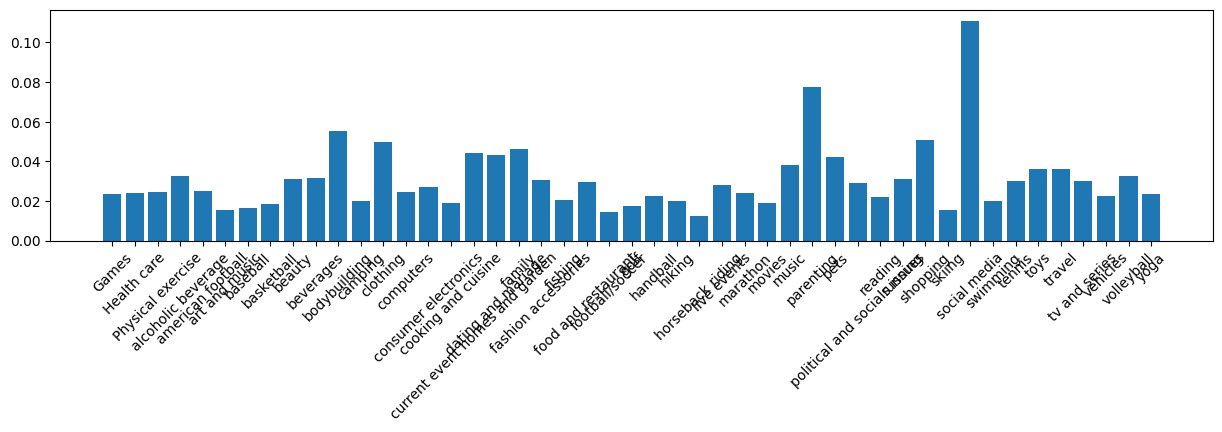

In [22]:
import matplotlib.pyplot as plt
     

plt.rcParams["figure.figsize"] = (15,3)
plt.bar(categor_freq.index, categor_freq.values)
_ = plt.xticks(rotation = 45)

In [23]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import PCA
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
stop_words = set(stopwords.words('english'))

[nltk_data] Downloading package stopwords to /usr/share/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [24]:
!nvidia-smi
     

!pip install transformers
     

import os
import pandas as pd
import numpy as np
import shutil
import sys
import tqdm.notebook as tq
from collections import defaultdict

import torch
import torch.nn as nn

device = torch.device('cuda') if torch.cuda.is_available() else torch.device('cpu')

Tue Jun  4 02:33:02 2024       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 535.129.03             Driver Version: 535.129.03   CUDA Version: 12.2     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  Tesla P100-PCIE-16GB           Off | 00000000:00:04.0 Off |                    0 |
| N/A   27C    P0              25W / 250W |      0MiB / 16384MiB |      0%      Default |
|                                         |                      |                  N/A |
+-----------------------------------------+----------------------+--

In [25]:
df.head()

,captions,Auto racing,Business,Games,Health care,Physical exercise,alcoholic beverage,american football,art and music,baseball,...,skiing,social media,swimming,tennis,toys,travel,tv and series,vehicles,volleyball,yoga
0,happiness felicidades mi amor te amamos angely...,0,1,0,0,0,0,0,0,0,...,0,1,0,0,1,0,0,0,1,0
1,happy birthday queen kourtneykardash there s n...,0,1,0,0,0,0,0,0,0,...,0,1,0,0,1,0,0,0,0,0
2,now you know why we re always stressed out hug...,0,0,0,1,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
3,this kid is never coming back to my stream awa...,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
4,scrolling because you re putting off springcle...,0,0,0,1,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0


In [27]:
# def concatenate_captions(posts):
#     return ' '.join(post['caption'] for post in posts if post.get('caption'))

# # Apply the function to the posts column
# df['captions'] = df['posts'].apply(concatenate_captions)

In [28]:
df.head()

,captions,Auto racing,Business,Games,Health care,Physical exercise,alcoholic beverage,american football,art and music,baseball,...,skiing,social media,swimming,tennis,toys,travel,tv and series,vehicles,volleyball,yoga
0,happiness felicidades mi amor te amamos angely...,0,1,0,0,0,0,0,0,0,...,0,1,0,0,1,0,0,0,1,0
1,happy birthday queen kourtneykardash there s n...,0,1,0,0,0,0,0,0,0,...,0,1,0,0,1,0,0,0,0,0
2,now you know why we re always stressed out hug...,0,0,0,1,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
3,this kid is never coming back to my stream awa...,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
4,scrolling because you re putting off springcle...,0,0,0,1,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0


In [29]:
df=df[interests + ['captions']]

In [30]:
len(df[interests])

3587

In [31]:
def replace_abbreviations(text, path):
    with open(path, 'r') as file:
        data = json.load(file)
    abbreviation_dict = data["abbreviation_dict"]
    words = text.split()
    replaced_words = [abbreviation_dict.get(word.upper(), word) for word in words]
    replaced_text = ' '.join(replaced_words)
    return replaced_text

In [34]:
import emoji
from bs4 import BeautifulSoup
import string
import re

df['captions'] = df['captions'].apply(text_preprocessing_pipeline)


## Bert

In [35]:
from transformers import BertTokenizer

tokenizer = BertTokenizer.from_pretrained('bert-base-cased')

tokenizer_config.json:   0%|          | 0.00/49.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/213k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/436k [00:00<?, ?B/s]

/opt/conda/lib/python3.10/site-packages/huggingface_hub/file_download.py:1132: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(


config.json:   0%|          | 0.00/570 [00:00<?, ?B/s]

In [36]:
token = tokenizer.encode_plus(
    df['captions'].iloc[0], 
    max_length=256, 
    truncation=True, 
    padding='max_length', 
    add_special_tokens=True,
    return_tensors='tf'
)

2024-06-04 02:44:57.779197: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-06-04 02:44:57.779349: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-06-04 02:44:57.888841: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


In [37]:
from tqdm.notebook import tqdm  
def tokenize_data(df, ids, masks, tokenizer):
    for i, text in tqdm(enumerate(df['captions']), total=len(df), desc='training', ncols=100):
        tokenized_text = tokenizer.encode_plus(
            text,
            max_length=256, 
            truncation=True, 
            padding='max_length', 
            add_special_tokens=True,
            return_tensors='tf'
        )
        input_ids[i, :] = tokenized_text.input_ids
        attention_masks[i, :] = tokenized_text.attention_mask
    return input_ids, attention_masks

In [38]:
input_ids = np.zeros((len(df), 256))
attention_masks = np.zeros((len(df), 256))
X_input_ids, X_attn_masks = tokenize_data(df, input_ids, attention_masks, tokenizer)

training:   0%|                                                            | 0/3587 [00:00<?, ?it/s]

In [39]:
labels = df[interests].values.astype('int8')
labels.shape

(3587, 49)

In [40]:
import tensorflow as tf

dataset = tf.data.Dataset.from_tensor_slices((X_input_ids, X_attn_masks, labels))


In [41]:
dataset

<_TensorSliceDataset element_spec=(TensorSpec(shape=(256,), dtype=tf.float64, name=None), TensorSpec(shape=(256,), dtype=tf.float64, name=None), TensorSpec(shape=(49,), dtype=tf.int8, name=None))>

In [42]:
def preprocess_data(input_ids, attention_mask, labels):
    labels = tf.cast(labels, tf.float32)
    return {"input_ids": input_ids, "attention_mask": attention_mask}, labels

In [43]:
dataset = dataset.map(preprocess_data)
dataset

<_MapDataset element_spec=({'input_ids': TensorSpec(shape=(256,), dtype=tf.float64, name=None), 'attention_mask': TensorSpec(shape=(256,), dtype=tf.float64, name=None)}, TensorSpec(shape=(49,), dtype=tf.float32, name=None))>

In [44]:
batch_size = 16
dataset = dataset.shuffle(10000).batch(batch_size, drop_remainder=True) 
dataset

<_BatchDataset element_spec=({'input_ids': TensorSpec(shape=(16, 256), dtype=tf.float64, name=None), 'attention_mask': TensorSpec(shape=(16, 256), dtype=tf.float64, name=None)}, TensorSpec(shape=(16, 49), dtype=tf.float32, name=None))>

In [45]:
p = 0.7 
train_size = int((len(df)//batch_size)*p) 
train_size

156

In [46]:
train_dataset = dataset.take(train_size)
val_test_dataset = dataset.skip(train_size)
val_dataset = val_test_dataset.take(len(val_test_dataset)//2)
test_dataset = val_test_dataset.skip(len(val_test_dataset)//2)
#number of batches per dataset
len(train_dataset), len(val_dataset), len(test_dataset)

(156, 34, 34)

In [47]:
from transformers import TFBertModel

model = TFBertModel.from_pretrained('bert-base-cased') 

model.safetensors:   0%|          | 0.00/436M [00:00<?, ?B/s]

Some weights of the PyTorch model were not used when initializing the TF 2.0 model TFBertModel: ['cls.seq_relationship.weight', 'cls.predictions.transform.LayerNorm.weight', 'cls.predictions.transform.dense.weight', 'cls.predictions.transform.LayerNorm.bias', 'cls.seq_relationship.bias', 'cls.predictions.transform.dense.bias', 'cls.predictions.bias']
- This IS expected if you are initializing TFBertModel from a PyTorch model trained on another task or with another architecture (e.g. initializing a TFBertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFBertModel from a PyTorch model that you expect to be exactly identical (e.g. initializing a TFBertForSequenceClassification model from a BertForSequenceClassification model).
All the weights of TFBertModel were initialized from the PyTorch model.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFBertModel for predictions w

In [48]:
labels.shape

(3587, 49)

In [49]:
train_dataset

<_TakeDataset element_spec=({'input_ids': TensorSpec(shape=(16, 256), dtype=tf.float64, name=None), 'attention_mask': TensorSpec(shape=(16, 256), dtype=tf.float64, name=None)}, TensorSpec(shape=(16, 49), dtype=tf.float32, name=None))>

In [50]:
# Apply the preprocessing function to the datasets
# train_dataset = train_dataset.map(lambda input_ids, attention_mask, labels: preprocess_data(input_ids, attention_mask, labels))
# val_dataset = val_dataset.map(lambda input_ids, attention_mask, labels: preprocess_data(input_ids, attention_mask, labels))


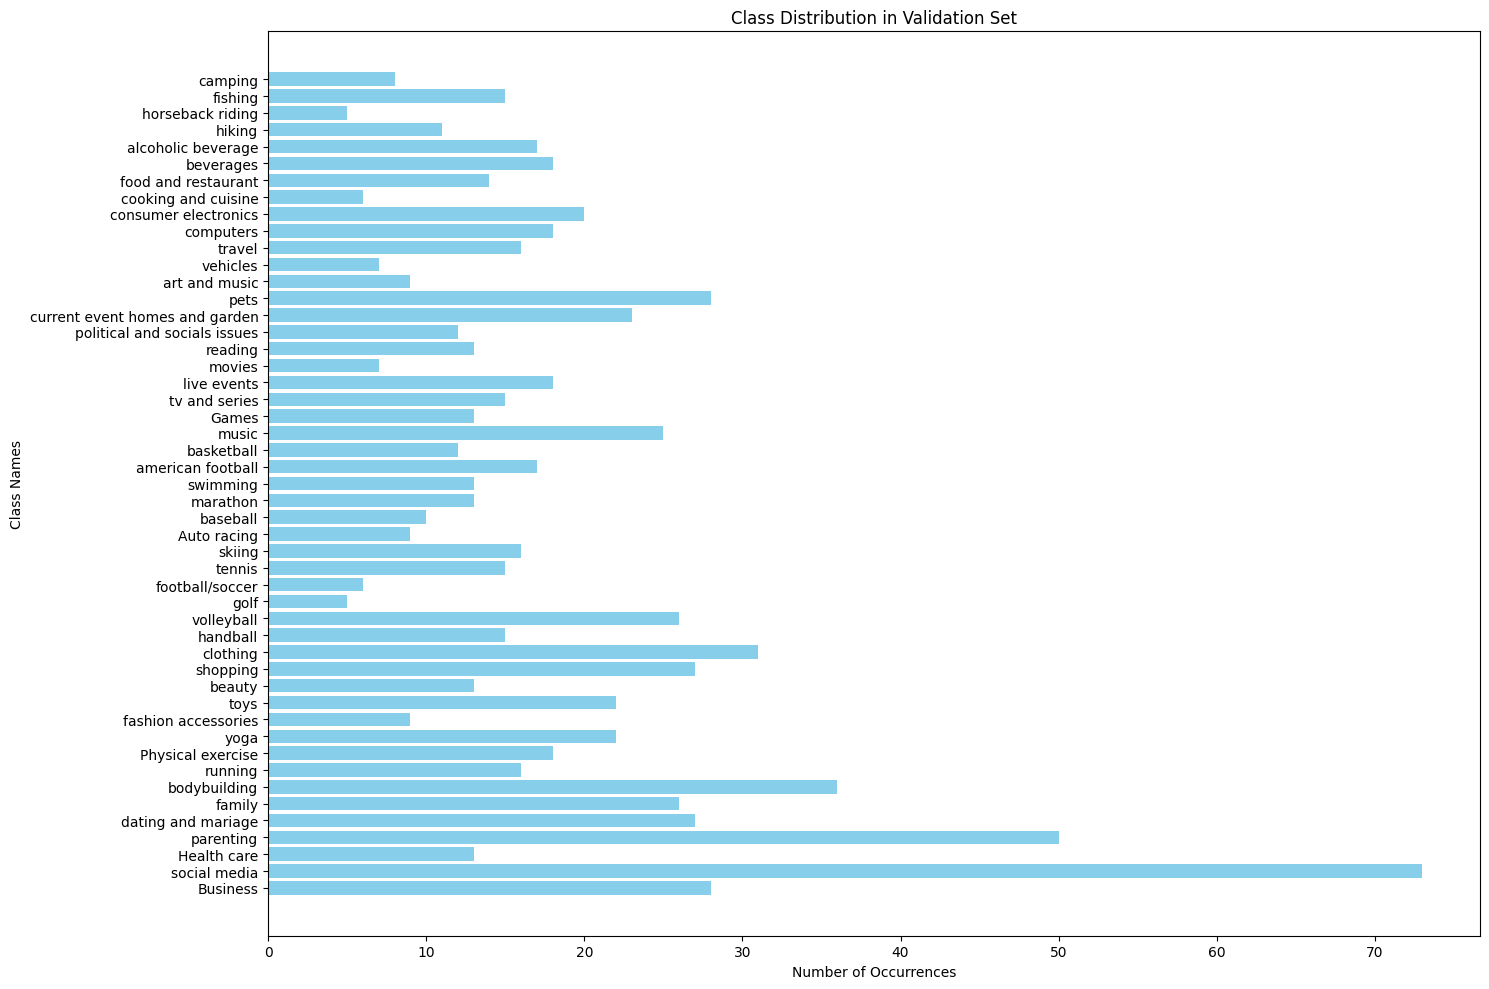

In [61]:
# Initialize a list to count the occurrences of each class
class_counts = np.zeros(len(interests))

# Iterate over the validation dataset and count the labels
for _, labels in val_dataset:
    class_counts += np.sum(labels.numpy(), axis=0)

# Plotting the class distribution
plt.figure(figsize=(15, 10))
plt.barh(interests, class_counts, color='skyblue')
plt.xlabel('Number of Occurrences')
plt.ylabel('Class Names')
plt.title('Class Distribution in Validation Set')
plt.tight_layout()
plt.show()

In [51]:
# defining 2 input layers for input_ids and attn_masks
input_ids = tf.keras.layers.Input(shape=(256,), name='input_ids', dtype='int32')
attn_masks = tf.keras.layers.Input(shape=(256,), name='attention_mask', dtype='int32')

bert_embds = model.bert(input_ids, attention_mask=attn_masks)[1] 
hidden_layer = tf.keras.layers.Dense(512, activation='relu', name='hidden_layer')(bert_embds)
output_layer = tf.keras.layers.Dense(labels.shape[1], activation='sigmoid', name='output_layer')(hidden_layer) 

model = tf.keras.Model(inputs=[input_ids, attn_masks], outputs=output_layer)
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_ids (InputLayer)      [(None, 256)]                0         []                            
                                                                                                  
 attention_mask (InputLayer  [(None, 256)]                0         []                            
 )                                                                                                
                                                                                                  
 bert (TFBertMainLayer)      TFBaseModelOutputWithPooli   1083102   ['input_ids[0][0]',           
                             ngAndCrossAttentions(last_   72         'attention_mask[0][0]']      
                             hidden_state=(None, 256, 7                                       

In [52]:
optimizer = tf.keras.optimizers.legacy.Adam(learning_rate=3e-5)
loss = tf.keras.losses.BinaryCrossentropy()
metrics = [
    tf.keras.metrics.BinaryAccuracy(name='accuracy'), 
    tf.keras.metrics.F1Score(name='f1_score')
]

model.compile(optimizer=optimizer, loss=loss, metrics=metrics)

In [53]:
history = model.fit(train_dataset, epochs=12, validation_data=val_dataset, verbose=1, batch_size=batch_size, shuffle=True)

Epoch 1/12
156/156 [==============================] - 153s 586ms/step - loss: 0.2170 - accuracy: 0.9427 - f1_score: 0.0119 - val_loss: 0.1305 - val_accuracy: 0.9692 - val_f1_score: 0.0156
Epoch 2/12
156/156 [==============================] - 81s 516ms/step - loss: 0.1212 - accuracy: 0.9702 - f1_score: 0.0346 - val_loss: 0.1079 - val_accuracy: 0.9726 - val_f1_score: 0.1074
Epoch 3/12
156/156 [==============================] - 81s 516ms/step - loss: 0.0914 - accuracy: 0.9733 - f1_score: 0.3499 - val_loss: 0.0650 - val_accuracy: 0.9789 - val_f1_score: 0.6135
Epoch 4/12
156/156 [==============================] - 81s 516ms/step - loss: 0.0523 - accuracy: 0.9828 - f1_score: 0.6767 - val_loss: 0.0350 - val_accuracy: 0.9930 - val_f1_score: 0.7711
Epoch 5/12
156/156 [==============================] - 81s 516ms/step - loss: 0.0292 - accuracy: 0.9932 - f1_score: 0.7780 - val_loss: 0.0189 - val_accuracy: 0.9973 - val_f1_score: 0.8019
Epoch 6/12
156/156 [==============================] - 81s 516ms/

In [54]:
import matplotlib.pyplot as plt
def plot_results(history):
  plt.plot(history.history['accuracy'])
  plt.plot(history.history['val_accuracy'])
  plt.title('model accuracy')
  plt.ylabel('accuracy')
  plt.xlabel('epoch')
  plt.legend(['train','test'], loc='upper left')
  plt.show()

  plt.plot(history.history['loss'])
  plt.plot(history.history['val_loss'])
  plt.title('model loss')
  plt.ylabel('loss')
  plt.xlabel('epoch')
  plt.legend(['train','test'], loc='upper left')
  plt.show()


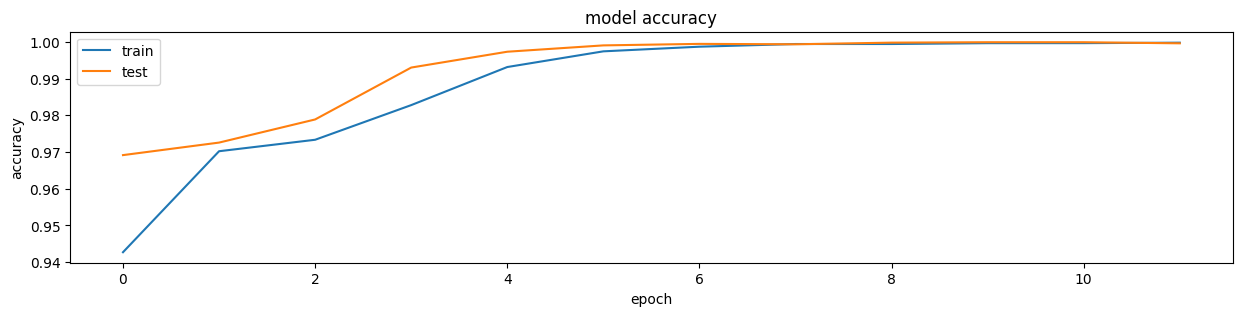

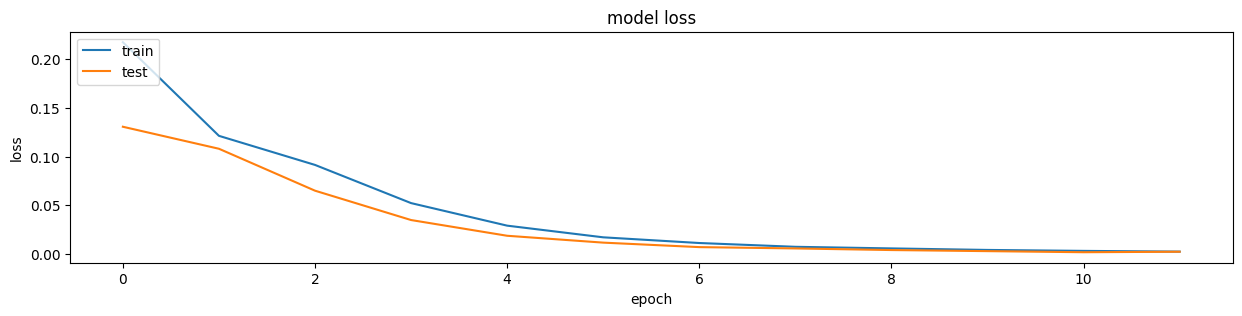

In [55]:
plot_results(history)

In [56]:
def prepare_data(input_text, tokenizer):
    input_text = clean_text(input_text)
    token = tokenizer.encode_plus(
        input_text,
        max_length=256, 
        truncation=True, 
        padding='max_length', 
        add_special_tokens=True,
        return_tensors='tf'
    )
    return {
        'input_ids': tf.cast(token.input_ids, tf.float64),
        'attention_mask': tf.cast(token.attention_mask, tf.float64)
    }

def make_prediction(model, processed_data, classes=['Business and Industry', 'Entertainment', 'Outdoors', 'Technology', 'family and relationships', 'fitness and wellness', 'food and drink', 'hobbies and activities', 'shopping and fashion', 'sports']):
    probs = model.predict(processed_data)[0]
    threshold = 0.5
    return pd.Series(data=probs, index=classes)[lambda x: x > threshold].sort_values(ascending=False)

In [57]:
# Score the model on the test data and show random samples
# Evaluate the model on the test data
test_loss, test_acc, test_f1 = model.evaluate(test_dataset.take(10), verbose=1)

# Print the test results
print(f'Test loss: {test_loss}')
print(f'Test accuracy: {test_acc}')
print(f'Test F1 score: {test_f1}')


10/10 [==============================] - 2s 157ms/step - loss: 0.0016 - accuracy: 1.0000 - f1_score: 0.7944
Test loss: 0.0016473091673105955
Test accuracy: 1.0
Test F1 score: [0.5        0.95       0.5        0.2857143  0.71428573 0.85714287
 0.53333336 0.3333333  0.5714286  0.8333334  1.         0.2857143
 1.         0.22222222 0.22222222 1.         0.5714286  0.85714287
 1.         0.8333334  1.         1.         1.         1.
 1.         0.4        1.         0.2857143  1.         1.
 1.         1.         1.         1.         0.7368421  0.8333334
 0.         1.         1.         1.         1.         1.
 0.90909094 1.         0.88888896 1.         1.         0.8
 1.        ]


In [58]:
from sklearn.metrics import classification_report, accuracy_score
y_true = []  
y_pred = []  

for batch in test_dataset.take(10):
    inputs, targets = batch
    predictions = model.predict(inputs)
    predicted_labels = np.round(predictions) 
    y_true.extend(targets.numpy().tolist())
    y_pred.extend(predicted_labels.tolist())

y_true = np.array(y_true)
y_pred = np.array(y_pred)

accuracy = accuracy_score(y_true, y_pred)

report = classification_report(y_true, y_pred, target_names=interests, zero_division=0, output_dict=True)

1/1 [==============================] - 0s 190ms/step


In [ ]:
# Extract the metrics from the classification report
class_names = interests
metrics = ['precision', 'recall', 'f1-score']

fig, ax = plt.subplots()
x = np.arange(len(class_names))
width = 0.2
for i, metric in enumerate(metrics):
    metric_values = [report[class_name][metric] for class_name in class_names]
    ax.bar(x + i * width, metric_values, width, label=metric)

ax.set_xticks(x + width)
ax.set_xticklabels(class_names, rotation=90)
ax.set_ylabel('Score')
ax.set_title('Classification Metrics')
ax.legend()

# Show the plot
plt.show()

In [ ]:
print(report['micro avg'])


In [ ]:
model.save('bert49_model.h5')  # Saves the entire model to a HDF5 file

In [ ]:
import os
os.chdir(r'/kaggle/working')

In [ ]:
%cd /kaggle/working

In [ ]:
%ls

In [ ]:
from IPython.display import FileLink
FileLink(r'bert49_model.h5')

pytorch bert